# Film Series Customer Satisfaction Analysis

In [1]:
#import the packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import re

import scipy.stats as stats

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

from dateutil.relativedelta import relativedelta

In [2]:
# Load the data
Films = pd.read_csv( 'Films.csv' )
Films

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,2,2,1.0,2.0,1.0,1.0,2.0,1.0,1
326,0,Old School,1,1,2.0,2.0,2.0,2.0,3.0,3.0,5
327,0,Old School,2,1,2.0,1.0,1.0,2.0,2.0,2.0,5
328,0,Old School,1,1,1.0,1.0,1.0,1.0,2.0,1.0,3


In [3]:
Films.value_counts()

_rowstate_  Movie                    Gender  Marital_Status  Sinage  Parking  Clean  Overall  Age  Income  Hear_About
0           Willy Wonka              2       2               2.0     2.0      2.0    2.0      2.0  1.0     5             7
                                             1               2.0     2.0      2.0    2.0      3.0  3.0     5             5
                                             2               1.0     1.0      1.0    1.0      2.0  1.0     5             5
            Ferris Buellers Day Off  2       2               2.0     2.0      2.0    2.0      2.0  1.0     5             3
            Willy Wonka              1       1               2.0     2.0      2.0    2.0      3.0  3.0     5             3
                                                                                                                        ..
            Ferris Buellers Day Off  Female  Slngle          1.0     2.0      1.0    1.0      2.0  2.0     4             1
                     

In [4]:
# Dropping the irrelevant column:
Films = Films.drop('_rowstate_',axis = 1)

In [5]:
Films.dtypes

Movie              object
Gender             object
Marital_Status     object
Sinage            float64
Parking           float64
Clean             float64
Overall           float64
Age               float64
Income            float64
Hear_About         object
dtype: object

In [6]:
Films['Gender'] = Films.Gender.replace('Female',2)

In [7]:
Films['Gender'] = Films.Gender.replace('Male',1).astype('float')

In [8]:
Films['Marital_Status'] = Films.Marital_Status.replace('Married',1)
Films['Marital_Status'] = Films.Marital_Status.replace('Single',2)

In [9]:
Films['Marital_Status'] = Films.Marital_Status.replace('Slngle',2)

In [10]:
Films.dtypes

Movie              object
Gender            float64
Marital_Status     object
Sinage            float64
Parking           float64
Clean             float64
Overall           float64
Age               float64
Income            float64
Hear_About         object
dtype: object

In [11]:
Films

,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,Ferris Buellers Day Off,2.0,1,2.0,2.0,2.0,2.0,3.0,1.0,5
1,Ferris Buellers Day Off,2.0,2,1.0,1.0,1.0,1.0,2.0,1.0,5
2,Ferris Buellers Day Off,1.0,1,2.0,4.0,3.0,2.0,4.0,1.0,5
3,Ferris Buellers Day Off,2.0,1,1.0,3.0,2.0,2.0,4.0,1.0,5
4,Ferris Buellers Day Off,2.0,1,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...
325,Old School,2.0,2,1.0,2.0,1.0,1.0,2.0,1.0,1
326,Old School,1.0,1,2.0,2.0,2.0,2.0,3.0,3.0,5
327,Old School,2.0,1,2.0,1.0,1.0,2.0,2.0,2.0,5
328,Old School,1.0,1,1.0,1.0,1.0,1.0,2.0,1.0,3


In [12]:
Films['Hear_About'] = Films['Hear_About'].str.split(',', expand = True)[0]

In [13]:
Films.Hear_About.value_counts()

5    227
4     42
1     23
3     17
2     14
Name: Hear_About, dtype: int64

In [14]:
Films = Films.reset_index()

In [15]:
Films

,index,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,2.0,1,2.0,2.0,2.0,2.0,3.0,1.0,5
1,1,Ferris Buellers Day Off,2.0,2,1.0,1.0,1.0,1.0,2.0,1.0,5
2,2,Ferris Buellers Day Off,1.0,1,2.0,4.0,3.0,2.0,4.0,1.0,5
3,3,Ferris Buellers Day Off,2.0,1,1.0,3.0,2.0,2.0,4.0,1.0,5
4,4,Ferris Buellers Day Off,2.0,1,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
325,325,Old School,2.0,2,1.0,2.0,1.0,1.0,2.0,1.0,1
326,326,Old School,1.0,1,2.0,2.0,2.0,2.0,3.0,3.0,5
327,327,Old School,2.0,1,2.0,1.0,1.0,2.0,2.0,2.0,5
328,328,Old School,1.0,1,1.0,1.0,1.0,1.0,2.0,1.0,3


In [16]:
sinage_mode = Films.Sinage.mode()
Parking_mode = Films.Parking.mode()
Clean_mode = Films.Clean.mode() 
Overall_mode = Films.Overall.mode()

print('Sinage mode:', sinage_mode)
print('Parking mode:', Parking_mode)
print('Clean mode:', Clean_mode)
print('Overall mode:', Overall_mode)

Sinage mode: 0    2.0
dtype: float64
Parking mode: 0    2.0
dtype: float64
Clean mode: 0    2.0
dtype: float64
Overall mode: 0    2.0
dtype: float64


,2.0,1.0,3.0,4.0,5.0
Sinage,156,113,48,6,5
Parking,153,135,29,7,4
Clean,152,144,24,5,2
Overall,160,151,12,1,4


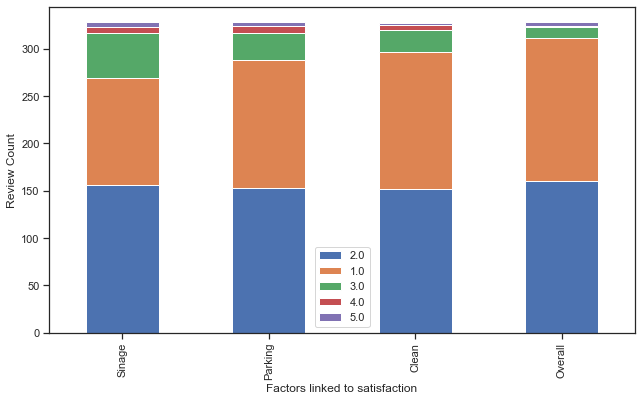

In [17]:
temp = Films[['Sinage','Parking', 'Clean', 'Overall']]
temp_data = pd.DataFrame(pd.concat([temp[column].value_counts() for column in temp], axis = 1))
final = temp_data.sort_values(by = ['Sinage','Parking','Clean','Overall'], ascending = False).T
final.plot(kind = 'bar',stacked = True, figsize = (10.5,6), legend = True, xlabel='Factors linked to satisfaction', ylabel='Review Count')
final

# Variation of customer satisfaction level with Age.

**Null hypothesis (Ho): Different age categories has same effect on the Overall customer satisfaction level.**
    
**Alternate Hypothesis (Ha) : Different age categories has no effect on the Overall customer satisfaction level.**
    
**Confidence Interval : 95% ; p-value : 0.05**

In [18]:
#Age- Wise Customer Overall Satisfaction

print('Age category wise patron count')
print(Films.Age.value_counts())

relate_age = Films.corrwith(Films.Age)
print('The corelation between different variables with Age:',relate_age)

Age_vs_Overall = pd.crosstab(index = Films.Age,columns = Films.Overall)
print('Checking the variation of Overall customer satisfaction with different Age categories')
print(Age_vs_Overall)
print(stats.chi2_contingency(Age_vs_Overall))

print('p-value > 0.05, we cannot reject the null hypothesis and we can say that different Age categories has same effect on the Overall customer satisfaction.')

Age category wise patron count
2.0    175
3.0    117
1.0     26
4.0     10
Name: Age, dtype: int64
The corelation between different variables with Age: index     -0.026091
Gender    -0.003876
Sinage    -0.091512
Parking   -0.023607
Clean     -0.005052
Overall   -0.034171
Age        1.000000
Income     0.144772
dtype: float64
Checking the variation of Overall customer satisfaction with different Age categories
Overall  1.0  2.0  3.0  4.0  5.0
Age                             
1.0       16    8    1    0    1
2.0       74   87    8    1    3
3.0       56   58    3    0    0
4.0        3    7    0    0    0
(10.578834827658923, 0.565314833241553, 12, array([[1.18834356e+01, 1.27607362e+01, 9.57055215e-01, 7.97546012e-02,
        3.19018405e-01],
       [7.90705521e+01, 8.49079755e+01, 6.36809816e+00, 5.30674847e-01,
        2.12269939e+00],
       [5.34754601e+01, 5.74233129e+01, 4.30674847e+00, 3.58895706e-01,
        1.43558282e+00],
       [4.57055215e+00, 4.90797546e+00, 3.68098160e-01

# Variation of customer satisfaction level with Marital Status

**Null hypothesis (Ho): Marital Status has same effect on the Overall customer satisfaction level.**
    
**Alternate Hypothesis (Ha) : Marital Status has no effect on the Overall customer satisfaction level.**
    
**Confidence Interval : 95% ; p-value : 0.05**

In [19]:
#Marital Status vs Customer Overall Satisfaction

Marry_vs_Overall = pd.crosstab(index = Films.Marital_Status,columns = Films.Overall)
print('Checking the variation of Overall customer satisfaction with different Marital status categories')
print(Marry_vs_Overall)
print(stats.chi2_contingency(Marry_vs_Overall))

print('p-value > 0.05, we cannot reject the null hypothesis and we can say that different marital status categories has same effect on the Overall customer satisfaction.')

Checking the variation of Overall customer satisfaction with different Marital status categories
Overall         1.0  2.0  3.0  4.0  5.0
Marital_Status                         
1                 4    8    0    0    0
2                11    7    1    0    1
1                42   42    2    1    0
2                93  102    9    0    3
(10.10436466672324, 0.6068051847581066, 12, array([[5.52147239e+00, 5.85276074e+00, 4.41717791e-01, 3.68098160e-02,
        1.47239264e-01],
       [9.20245399e+00, 9.75460123e+00, 7.36196319e-01, 6.13496933e-02,
        2.45398773e-01],
       [4.00306748e+01, 4.24325153e+01, 3.20245399e+00, 2.66871166e-01,
        1.06748466e+00],
       [9.52453988e+01, 1.00960123e+02, 7.61963190e+00, 6.34969325e-01,
        2.53987730e+00]]))
p-value > 0.05, we cannot reject the null hypothesis and we can say that different marital status categories has same effect on the Overall customer satisfaction.


# Gender wise Customer Satisfaction Level

**Null hypothesis (Ho): Gender category has same effect on the Overall customer satisfaction level.**
    
**Alternate Hypothesis (Ha) : Gender category has different effect on the Overall customer satisfaction level.**
    
**Confidence Interval : 95% ; p-value : 0.05**

In [20]:
#Gender vs Customer Overall Satisfaction

relate_gender = Films.corrwith(Films.Gender)
print('The corelation between different variables with Gender:',relate_gender)

Gender_vs_Overall = pd.crosstab(index = Films.Gender,columns = Films.Overall)
print('Checking the variation of Overall customer satisfaction with Gender')
print(Gender_vs_Overall)
print(stats.chi2_contingency(Gender_vs_Overall))

print('p-value > 0.05, we cannot reject the null hypothesis and we can say that Gender has no effect on the Overall customer satisfaction.')

The corelation between different variables with Gender: index      0.027297
Gender     1.000000
Sinage    -0.103333
Parking   -0.090323
Clean     -0.069377
Overall   -0.076044
Age       -0.003876
Income    -0.042509
dtype: float64
Checking the variation of Overall customer satisfaction with Gender
Overall  1.0  2.0  3.0  4.0  5.0
Gender                          
1.0       49   58    7    0    2
2.0      102  102    5    1    2
(4.307408141487173, 0.3659983648347132, 4, array([[ 53.40243902,  56.58536585,   4.24390244,   0.35365854,
          1.41463415],
       [ 97.59756098, 103.41463415,   7.75609756,   0.64634146,
          2.58536585]]))
p-value > 0.05, we cannot reject the null hypothesis and we can say that Gender has no effect on the Overall customer satisfaction.


# Customer satisfaction level as per Patron's Income categories.

**Null hypothesis (Ho): Different Income category patrons has same effect on the Overall customer satisfaction level.**
    
**Alternate Hypothesis (Ha) : Different Income category patrons has different effect on the Overall customer satisfaction level.**
    
**Confidence Interval : 95% ; p-value : 0.05**

In [21]:
#Income vs Customer Overall Satisfaction

relate_income = Films.corrwith(Films.Income)
print('The corelation between different variables with Income:',relate_income)

Income_vs_Overall = pd.crosstab(index = Films.Income,columns = Films.Overall)
print('Checking the variation of Overall customer satisfaction with Income levels')
print(Income_vs_Overall)
print(stats.chi2_contingency(Income_vs_Overall))

print('p-value > 0.05, we cannot reject the null hypothesis and we can say that different income levels have same effect on the Overall customer satisfaction.')

The corelation between different variables with Income: index     -0.067019
Gender    -0.042509
Sinage    -0.036721
Parking   -0.022084
Clean      0.019851
Overall   -0.004050
Age        0.144772
Income     1.000000
dtype: float64
Checking the variation of Overall customer satisfaction with Income levels
Overall  1.0  2.0  3.0  4.0  5.0
Income                          
1.0       65   67    7    1    1
2.0       41   36    4    0    1
3.0       38   50    1    0    1
(5.689397280419405, 0.6819780790955854, 8, array([[64.86900958, 68.92332268,  5.4057508 ,  0.45047923,  1.3514377 ],
       [37.72523962, 40.08306709,  3.14376997,  0.26198083,  0.78594249],
       [41.4057508 , 43.99361022,  3.45047923,  0.28753994,  0.86261981]]))
p-value > 0.05, we cannot reject the null hypothesis and we can say that different income levels have same effect on the Overall customer satisfaction.


# Media Outlets vs Patron Turnout

In [22]:
Films.Hear_About.value_counts()

5    227
4     42
1     23
3     17
2     14
Name: Hear_About, dtype: int64

 Patron turnout by Word of Mouth is the greatest. So, Word of mouth will be the best way to advertise the film series.


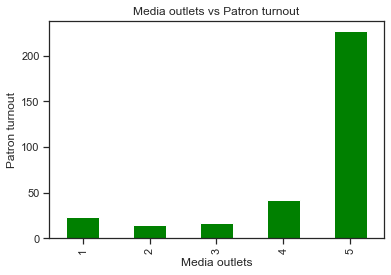

In [23]:
Films.groupby('Hear_About').index.count().plot(kind = 'bar',color= 'green')
plt.title('Media outlets vs Patron turnout')
plt.xlabel('Media outlets')
plt.ylabel('Patron turnout')
print(' Patron turnout by Word of Mouth is the greatest. So, Word of mouth will be the best way to advertise the film series.')

# 1 : Televisison
# 2 : Newspaper
# 3 : Radio
# 4 : Website
# 5 : Word of Mouth